In [1]:
from Dataset.Simulation.GaussCurve_TF import FBG_spectra
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
answer = tf.constant([0.45,0.55])
wrong = answer[::-1]
I = tf.constant([1,0.5])
W = tf.constant([0.2,0.2])

In [14]:
spectra = FBG_spectra(np.linspace(0,1,100),
tf.expand_dims(answer, axis=0),I,W).numpy()[0] + np.random.rand(100)*0.0002

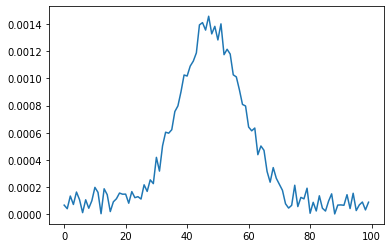

In [15]:
plt.plot(spectra)

In [16]:
try_f = tf.expand_dims(tf.linspace(-1.0,2.0,100), axis=1)
try_v = try_f*tf.expand_dims(wrong-answer, axis=0)+tf.expand_dims(answer,axis=0)

In [17]:
sim_spectra = FBG_spectra(np.linspace(0,1,100),
try_v,I,W).numpy()

In [18]:
def diff(x):
    return x[:,1:]-x[:,:-1]

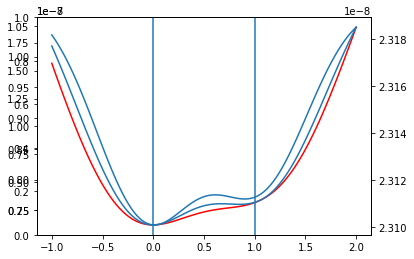

In [25]:
A = sim_spectra
B = spectra
plt.twinx()
err = (A - B) 
plt.plot(try_f, tf.reduce_mean((A - B)**2 , axis=1), c = 'red')

d = err
e = tf.reduce_mean(d**2, axis=1)

for i in range(2):
    d = diff(d)
    e*= 0.02
    e += tf.reduce_mean(d**2, axis=1)
    plt.twinx()
    plt.plot(try_f, tf.reduce_mean(d**2, axis=1))
plt.axvline(0)
plt.axvline(1)
plt.show()